# 1.2.0 American Community Survey

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

import requests

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Analyzing US Census Data in Python'
data = make_dir_line(modality, project)

raw = data('raw')

## 1.2.2 Home Values in California

In [4]:
# Build base URL
HOST = "https://api.census.gov/data"
dataset = 'acs/acs1'

# Specify Census variables and other predicates
get_vars = ['NAME,B25077_001E']
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:06"

col_names = ['name', 'median_home_value', 'state']

dfs = []

In [5]:
# Loop over years 2011 to 2017
for year in range(2011,2018):
    base_url = "/".join([HOST, str(year), dataset])
    r = requests.get(base_url, params=predicates)
    df = pd.DataFrame(columns=col_names, data=r.json()[1:])    
    # Add column to df to hold year value, append df to collector dfs
    df["year"] = year
    dfs.append(df)

# Concatenate all DataFrames, fix column type
states = pd.concat(dfs, ignore_index=True)
states["median_home_value"] = states["median_home_value"].astype(int)

In [6]:
states.head()

,name,median_home_value,state,year
0,California,355600,06,2011
1,California,349400,06,2012
2,California,373100,06,2013
3,California,412700,06,2014
4,California,449100,06,2015


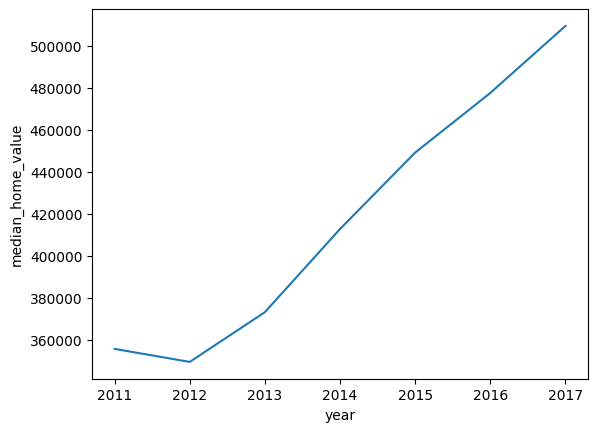

In [7]:
sns.lineplot(x='year', y='median_home_value', data = states)
plt.show()

## 1.2.3 Health Insurance Coverage

In [8]:
states = pd.read_csv(raw / "states2.csv", sep=',', index_col=0)
print(states.info())
states.head()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, Alabama to Puerto Rico
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   total                 104 non-null    int64
 1   m                     104 non-null    int64
 2   m_school              104 non-null    int64
 3   m_school_insured      104 non-null    int64
 4   m_school_uninsured    104 non-null    int64
 5   m_noschool            104 non-null    int64
 6   m_noschool_insured    104 non-null    int64
 7   m_noschool_uninsured  104 non-null    int64
 8   f                     104 non-null    int64
 9   f_school              104 non-null    int64
 10  f_school_insured      104 non-null    int64
 11  f_school_uninsured    104 non-null    int64
 12  f_noschool            104 non-null    int64
 13  f_noschool_insured    104 non-null    int64
 14  f_noschool_uninsured  104 non-null    int64
 15  state                 104 non-null    int64
 16 

,total,m,m_school,m_school_insured,m_school_uninsured,m_noschool,m_noschool_insured,m_noschool_uninsured,f,f_school,f_school_insured,f_school_uninsured,f_noschool,f_noschool_insured,f_noschool_uninsured,state,year
name,,,,,,,,,,,,,,,,,
Alabama,473462,232585,85373,70314,15059,147212,94399,52813,240877,98604,82273,16331,142273,99226,43047,1,2013
Alaska,74441,39221,12448,9595,2853,26773,15450,11323,35220,11842,9300,2542,23378,16430,6948,2,2013
Arizona,638949,320956,118316,92695,25621,202640,117675,84965,317993,128117,102229,25888,189876,132004,57872,4,2013
Arkansas,278976,139572,52120,41117,11003,87452,51092,36360,139404,56489,46287,10202,82915,51077,31838,5,2013
California,3955658,2014088,888289,685581,202708,1125799,670639,455160,1941570,950134,736577,213557,991436,696650,294786,6,2013


In [9]:
# Calculate percent insured
states["insured_total"] = states["m_school_insured"] +  states["m_noschool_insured"] + states["f_school_insured"] + states["f_noschool_insured"]
states["pct_insured"] = 100 * states["insured_total"] / states["total"]
states.head()

,total,m,m_school,m_school_insured,m_school_uninsured,m_noschool,m_noschool_insured,m_noschool_uninsured,f,f_school,f_school_insured,f_school_uninsured,f_noschool,f_noschool_insured,f_noschool_uninsured,state,year,insured_total,pct_insured
name,,,,,,,,,,,,,,,,,,,
Alabama,473462,232585,85373,70314,15059,147212,94399,52813,240877,98604,82273,16331,142273,99226,43047,1,2013,346212,73.123503
Alaska,74441,39221,12448,9595,2853,26773,15450,11323,35220,11842,9300,2542,23378,16430,6948,2,2013,50775,68.208380
Arizona,638949,320956,118316,92695,25621,202640,117675,84965,317993,128117,102229,25888,189876,132004,57872,4,2013,444603,69.583488
Arkansas,278976,139572,52120,41117,11003,87452,51092,36360,139404,56489,46287,10202,82915,51077,31838,5,2013,189573,67.953157
California,3955658,2014088,888289,685581,202708,1125799,670639,455160,1941570,950134,736577,213557,991436,696650,294786,6,2013,2789447,70.517901


In [10]:
# Pivot the table and rename the columns
states_pvt = states.pivot(index = "state", columns = "year", values = "pct_insured")
states_pvt.columns = ["pct_insured_2013", "pct_insured_2017"]
states_pvt.head()

,pct_insured_2013,pct_insured_2017
state,,
1,73.123503,80.464431
2,68.208380,77.655248
4,69.583488,83.534734
5,67.953157,86.249121
6,70.517901,89.316703


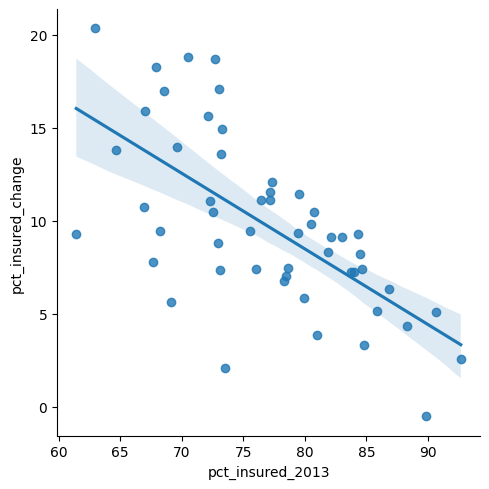

In [11]:
# Calculate the change in insurance rates 2013 to 2017
states_pvt["pct_insured_change"] = states_pvt["pct_insured_2017"] - states_pvt["pct_insured_2013"]

# Plot the change against initial (2013) insurance rates
sns.lmplot(x = "pct_insured_2013", y = "pct_insured_change", data = states_pvt)
plt.show()

## 1.2.6 Plotting Margins of Error over Time

In [23]:
philly = pd.read_csv(raw / "philly.csv", sep=',')
philly.head()

,median_home_value,median_home_value_moe,state,county,year
0,142000,4279,42,101,2011
1,142300,5229,42,101,2012
2,136800,4267,42,101,2013
3,148700,3778,42,101,2014
4,150700,3375,42,101,2015


In [24]:
# Calculate and inspect Relative Margin of Error
philly["rmoe"] = 100 * philly["median_home_value_moe"] / philly["median_home_value"]
print(philly)

   median_home_value  median_home_value_moe  state  county  year      rmoe
0             142000                   4279     42     101  2011  3.013380
1             142300                   5229     42     101  2012  3.674631
2             136800                   4267     42     101  2013  3.119152
3             148700                   3778     42     101  2014  2.540686
4             150700                   3375     42     101  2015  2.239549
5             154000                   3156     42     101  2016  2.049351
6             166200                   3549     42     101  2017  2.135379


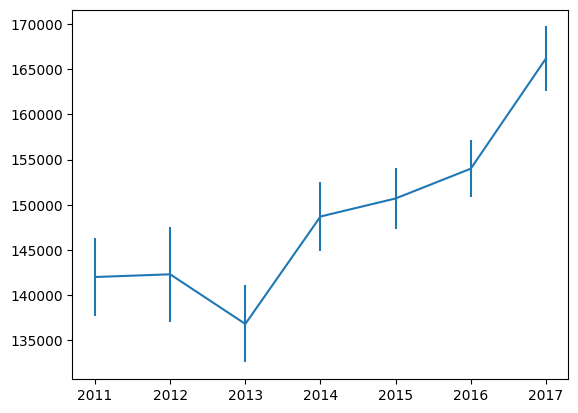

In [25]:
# Create line plot with error bars of 90% MOE
plt.errorbar("year", "median_home_value", yerr = "median_home_value_moe", data = philly)
plt.show()

## 1.2.7 Significance of Difference of Estimates

In [26]:
# Set the critical Z score for 90% confidence, prepare message
Z_CRIT = 1.645
msg = "Philadelphia median home values in {} were {}significantly different from {}."
for year in range(2012, 2018):
    # Assign current and prior year's median home value to variables
    x1 = int(philly[philly["year"] == year]["median_home_value"])
    x2 = int(philly[philly["year"] == year - 1]["median_home_value"])
    
    # Calculate standard error as 90% MOE / critical Z score
    se_x1 = float(philly[philly["year"] == year]["median_home_value_moe"] / Z_CRIT)
    se_x2 = float(philly[philly["year"] == year - 1]["median_home_value_moe"] / Z_CRIT)
    
    # Calculate two-sample z-statistic, output message if greater than critical Z score
    z = (x1 - x2) / np.sqrt(se_x1**2 + se_x2**2)
    print(msg.format(year, "" if abs(z) > Z_CRIT else "not ", year - 1))

Philadelphia median home values in 2012 were not significantly different from 2011.
Philadelphia median home values in 2013 were not significantly different from 2012.
Philadelphia median home values in 2014 were significantly different from 2013.
Philadelphia median home values in 2015 were not significantly different from 2014.
Philadelphia median home values in 2016 were not significantly different from 2015.
Philadelphia median home values in 2017 were significantly different from 2016.


## 1.2.8 Significance of Difference of Proportions

In [27]:
dc = pd.read_csv(raw / "bikes.csv", sep=',')
print(dc.info())
dc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   total_est  7 non-null      int64
 1   total_moe  7 non-null      int64
 2   bike_est   7 non-null      int64
 3   bike_moe   7 non-null      int64
 4   state      7 non-null      int64
 5   year       7 non-null      int64
dtypes: int64(6)
memory usage: 468.0 bytes
None


,total_est,total_moe,bike_est,bike_moe,state,year
0,306801,5723,9669,1400,11,2011
1,326143,6312,13493,2422,11,2012
2,330087,4834,14986,2071,11,2013
3,343062,5802,13330,1709,11,2014
4,358150,4914,14718,1816,11,2015


In [28]:
# Set the critical Z score for 90% confidence
Z_CRIT = 1.645

# Calculate share of bike commuting
dc["bike_share"] = dc["bike_est"] / dc["total_est"]

# Calculate standard errors of the estimate from MOEs
dc["se_bike"] = dc["bike_moe"] / Z_CRIT
dc["se_total"] = dc["total_moe"] / Z_CRIT
dc["se_p"] = np.sqrt(dc["se_bike"]**2 - dc["bike_share"]**2 * dc["se_total"]**2) / dc["total_est"]
dc.head()

,total_est,total_moe,bike_est,bike_moe,state,year,bike_share,se_bike,se_total,se_p
0,306801,5723,9669,1400,11,2011,0.031516,851.063830,3479.027356,0.002751
1,326143,6312,13493,2422,11,2012,0.041371,1472.340426,3837.082067,0.004488
2,330087,4834,14986,2071,11,2013,0.045400,1258.966565,2938.601824,0.003793
3,343062,5802,13330,1709,11,2014,0.038856,1038.905775,3527.051672,0.003002
4,358150,4914,14718,1816,11,2015,0.041095,1103.951368,2987.234043,0.003063


In [29]:
x1 = (dc[dc["year"] == 2017]["bike_share"]).reset_index(drop = True)
x2 = (dc[dc["year"] == 2011]["bike_share"]).reset_index(drop = True)
se_x1 = (dc[dc["year"] == 2017]["se_p"]**2).reset_index(drop = True)
se_x2 = (dc[dc["year"] == 2011]["se_p"]**2).reset_index(drop = True)

# Calculate the two sample statistic between 2011 and 2017
Z = (x1 - x2) / np.sqrt(se_x1 + se_x2)
Z

0    3.628454
dtype: float64

In [30]:
print(Z_CRIT < Z)

0    True
dtype: bool


## 1.2.10 Choropleth Map of Internet Access

In [32]:
geo_state = gpd.read_file(raw / "states_internet.gpkg")
geo_state.columns

Index(['state', 'postal', 'name', 'total', 'internet', 'dial_up', 'broadband',
       'satellite', 'other_service', 'internet_without_subscription',
       'no_internet', 'label_x', 'label_y', 'geometry'],
      dtype='object')

In [34]:
geo_state["pct_no_internet"] = 100 * geo_state['no_internet'] / geo_state['total']

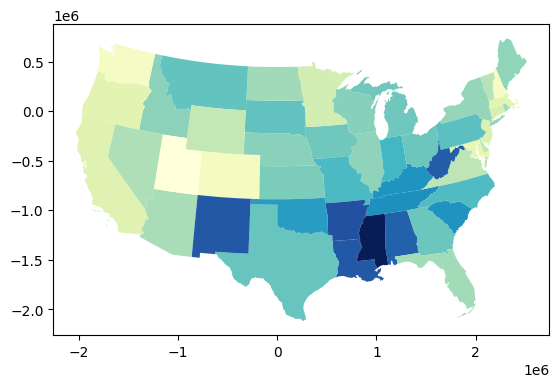

In [35]:
# Create choropleth map using YlGnBu colormap
geo_state.plot(column='pct_no_internet', cmap='YlGnBu')
plt.show()

## 1.2.11 Proportional Symbol Map of Households Internet

In [36]:
geo_state_pt = geo_state.copy()
geo_state_pt["geometry"] = geo_state_pt.geometry.centroid

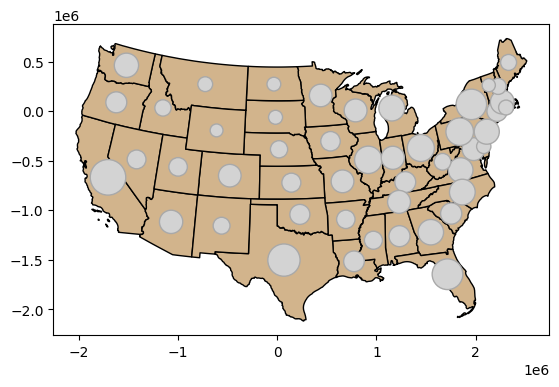

In [37]:
# Set basemap and create variable for markersize
basemap = geo_state.plot(color = "tan", edgecolor = "black")
ms = np.sqrt(geo_state_pt["internet"]) / 5

# Plot proportional symbols on top of basemap
geo_state_pt.plot(ax = basemap, markersize = ms, color = "lightgray", edgecolor = "darkgray")
plt.show()

## 1.2.12 Bivariate Map of Broadband Access

In [38]:
# Create point GeoDataFrame at centroid of states
geo_state_pt = geo_state.copy()
geo_state_pt["geometry"] = geo_state_pt.centroid

In [40]:
# Calculate percentage of internet households with broadband
geo_state["pct_broadband"] = 100 * geo_state["broadband"] / geo_state["internet"]

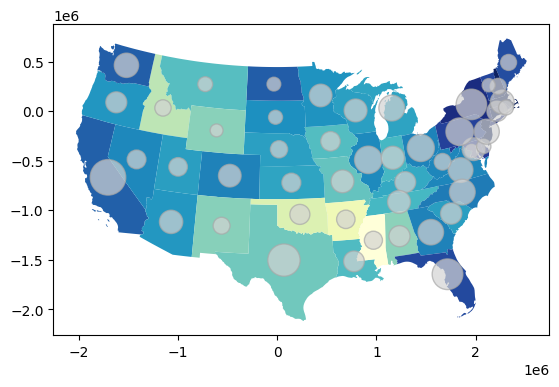

In [41]:
# Set choropleth basemap
basemap = geo_state.plot(column = "pct_broadband", cmap = "YlGnBu")

# Plot transparent proportional symbols on top of basemap
geo_state_pt.plot(ax = basemap, markersize = np.sqrt(geo_state["internet"]) / 5, color = "lightgray", edgecolor = "darkgray", alpha = 0.7)
plt.show()

## 0.2.13 Identifying Gentrifiable Tracts

In [28]:
bt = gpd.read_file(path.data_raw_dir("census/brooklyn_tract_2000.gpkg"))
bk_0 = pd.read_pickle(path.data_raw_dir("census/tracts_brooklyn_2000.pickle"))
bk_2000 = pd.merge(bt, bk_0, how='left', on=['state','county','tract']) 
bk_2000.shape

(783, 12)

In [29]:
bk_2000.columns

Index(['state', 'county', 'tract', 'geometry', 'mhi', 'mhi_msa',
       'median_value', 'median_value_msa', 'pct_recent_build',
       'pct_recent_build_msa', 'pct_ba', 'pct_ba_msa'],
      dtype='object')

In [30]:
# Median income below MSA median income
bk_2000["low_mhi"] = bk_2000["mhi"] < bk_2000["mhi_msa"]

In [31]:
# Recent construction below MSA
bk_2000["low_recent_build"] = bk_2000["pct_recent_build"] < bk_2000["pct_recent_build_msa"]

In [32]:
# Identify gentrifiable tracts
bk_2000["gentrifiable"] = (bk_2000["low_mhi"]) & (bk_2000["low_recent_build"])

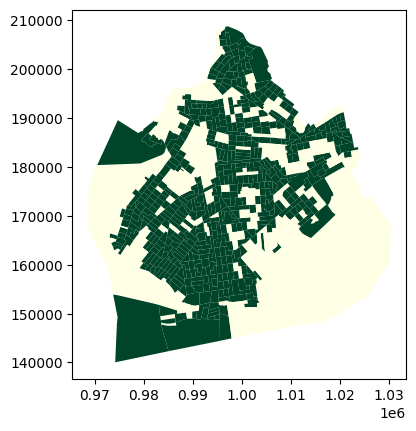

In [33]:
# Plot gentrifiable tracts
bk_2000.plot(column = "gentrifiable", cmap = "YlGn")
plt.show()

## 0.2.14 Identifying Gentrifying Tracts

In [34]:
bk_1 = pd.read_pickle(path.data_raw_dir("census/tracts_brooklyn_2010.pickle"))		
bk_2010 = pd.merge(bk_1, bt, how='left', on=['state','county','tract']) 
bk_2010.shape

(761, 15)

In [35]:
# Median income below MSA median income
bk_2010["low_mhi"] = bk_2010["mhi"] < bk_2010["mhi_msa"]

# Recent construction below MSA
bk_2010["low_recent_build"] = bk_2010["pct_recent_build"] < bk_2010["pct_recent_build_msa"]

# Identify gentrifiable tracts
bk_2010["gentrifiable"] = (bk_2010["low_mhi"]) & (bk_2010["low_recent_build"])


bk_2010 = bk_2010.loc[:,['state','county','tract','geometry','mhi','mhi_msa','median_value_2000','median_value_msa', 
                         'pct_recent_build','pct_recent_build_msa','pct_ba_2000','pct_ba_msa_2000','median_value_2010',
                         'pct_ba_2010','pct_ba_msa_2010','low_mhi','low_recent_build','gentrifiable']]

In [36]:
# Increase in percent BA greater than MSA
bk_2010["increasing_education"] = (bk_2010["pct_ba_2010"] - bk_2010["pct_ba_2000"]) > (bk_2010["pct_ba_msa_2010"] - bk_2010["pct_ba_msa_2000"])

# Increase in house value
bk_2010["increasing_house_value"] = bk_2010["median_value_2010"] > bk_2010["median_value_2000"] * 1.2612

# Identify gentryifying tracts
bk_2010["gentrifying"] = bk_2010["gentrifiable"] & bk_2010["increasing_education"] & bk_2010["increasing_house_value"]

In [37]:
bk_2010 = gpd.GeoDataFrame(bk_2010, crs = bk_2000.crs, geometry = bk_2010.geometry)
print(type(bk_2010))

<class 'geopandas.geodataframe.GeoDataFrame'>


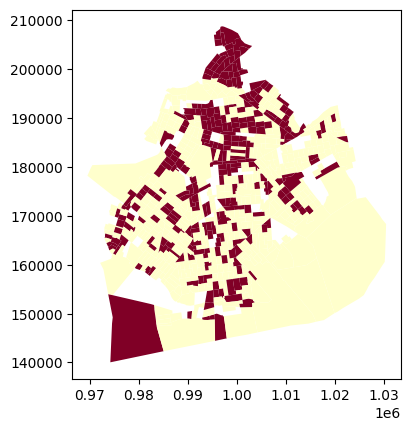

In [38]:
# Plot gentrifying tracts
bk_2010.plot(column = "gentrifying", cmap = "YlOrRd")
plt.show()

## 0.2.15 Mapping Gentrification

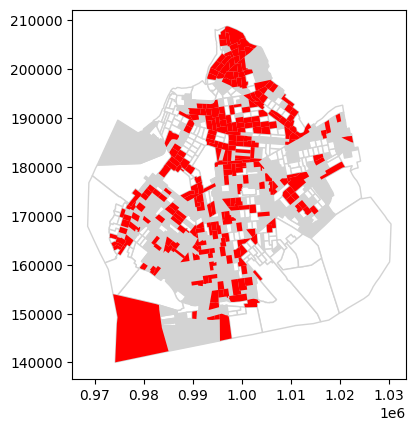

In [39]:
# Create a basemap
basemap = bk_2000.plot(color = "white", edgecolor = "lightgray")

# Filter and plot gentrifiable tracts
gentrifiable_tracts = bk_2000[bk_2000["gentrifiable"]]
gentrifiable_tracts.plot(ax = basemap, color = "lightgray")

# Filter and plot gentrifying tracts
gentrifying_tracts = bk_2010[bk_2010["gentrifying"]]
gentrifying_tracts.plot(ax = basemap, color = "red")
plt.show()

In [40]:
print('ok_')

ok_
